In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file as a link to github
url = '/kaggle/input/suspicious-communication-on-social-platforms/Suspicious Communication on Social Platforms.csv'
df = pd.read_csv(url)

#looking at the first five rows using .head() function
df.head()

#importing natural language Toolkit - A tool to preprocesses/clean text 
import nltk

In [54]:
#Checking that the latest nltk version is installed in the users local computer 
#Warning: install all the libraries required for this project
nltk.__version__

'3.2.4'

# Preprocessing

In [55]:
df.shape

(20001, 2)

In [56]:
#converting all missing values in tagging column into NaN
#example: converting None,NotAvailable,ValueMissing,etc into Nan
df=df[pd.to_numeric(df['tagging'], errors='coerce').notnull()]

In [57]:
#Droping all rows that contain Nan value 
df = df.dropna(axis=0)

In [58]:
#Since the shape is the same there are no missing valus in our dataset
df.shape

(20001, 2)

In [59]:
import string
from nltk import pos_tag#pos_tag is a tool that tags the part of speech to the word(POS = Part of Speech)
#example: tagging the word 'drinking' as verb

#function for removing punctuations
def tokenize_remove_punctuation(text):
  clean_text = []         #creaating an empty list to store the cleaned text
  text = text.split(" ")  #spliting all words in a sentence separated by " " and storing them in a list named 'text'
  for word in text:
    word = list(word)  #spliting all words into alphabets
    new_word = []      #creaating an empty list to store the new word after removing puntuations
    
    # spliting the words into alphabets is used because it will convert words like 'reading?' into 'reading'
    for c in word:
      if c not in string.punctuation:     #string.puntuation is a list og all puntuation marks , example :@!$%&?, etc.
        new_word.append(c)
      word = "".join(new_word)  #joing the alphabets to create the word after removing all puntuations
    clean_text.append(word)     #storing the word in the list named 'clean_text' to create the list of words in the sentence
  return clean_text


In [60]:
# using a sample sentence to see whether the funtion works well or not 
# NOTE: We have only created the functions till now. We haven't done anythong with our dataset till now.
trial_text = tokenize_remove_punctuation("hello @anyone reading? wt is the name of am in that this  ??!@")
trial_text

['hello',
 'anyone',
 'reading',
 'wt',
 'is',
 'the',
 'name',
 'of',
 'am',
 'in',
 'that',
 'this',
 [],
 '']

In [61]:
import nltk
#downloads the list of stopwords
nltk.download('stopwords')

#'stopwords' is a list of words that have nearly no value in the sentence
#example : 'I am a boy' is converted into 'boy'
#here words like 'I', 'am', 'a' ;these words have very less comtribution to the sentence

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
#storing all the stopwords in the list named 'stopwords' 
stopwords = nltk.corpus.stopwords.words('english')  #storing only english stopwords , there are stopwords for other language also such as chinese and french

# Function to remove all the stopwords from the sentence
def remove_stopwords(text):
  clean_text = []
  for word in text:
    if word not in stopwords:
      clean_text.append(word)
  return clean_text

In [63]:
# using a sample sentence to see whether the funtion works well or not
remove_stopwords(trial_text)

['hello', 'anyone', 'reading', 'wt', 'name', [], '']

In [64]:
#tagging all the words according o their part of speech
def pos_tagging(text):
    try:
        tagged = nltk.pos_tag(text)
        return tagged
    except Excepton as e:
        print(e)

In [65]:
from nltk.corpus import wordnet

#wordnet is a tool that reads that reads the tagging and returns the part of speech 
def get_wordnet(pos_tag):
  if pos_tag.startswith('J'):
    return wordnet.ADJ
  elif pos_tag.startswith('V'):
    return wordnet.VERB
  elif pos_tag.startswith('N'):
    return wordnet.NOUN
  elif pos_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [66]:
from nltk.stem import WordNetLemmatizer
#WordLemmatizer is a tool that converts word into root word
#Example: historical(word) is converted into history(root-word)

#Now we will create a function that uses all the functions that we have created above

def clean_text(text):
  text = str(text)
  #Converting text to lower-case
  text = text.lower()
  #tokenize and remove punctuations from the text
  text = tokenize_remove_punctuation(text)
  #remove words containing numericals
  text = [word for word in text if not any(c.isdigit() for c in word)]
  #remove stopwords
  text = remove_stopwords(text)
  #remove empty tokens
  text = [ t for t in text if len(t) > 0]
  #pos tagging
  pos_tags = pos_tagging(text)
  #Lemmatize text
  text = [WordNetLemmatizer().lemmatize(t[0],get_wordnet(t[1])) for t in pos_tags]
  #remove words with only one letter
  text = [ t for t in text if len(t)>1]
  #join all words
  text = " ".join(text)
  return text

In [67]:
#don't know what is 'averaged_perceptron_tagger'
#don't know why devansh downloaded it 
nltk.download('averaged_perceptron_tagger')

#Downloading the wordnet tool
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:

# using a sample sentence to see whether the funtion works well or not
clean_text("What is y0ur name? THis is a cat!! 12?")

'name cat'

<AxesSubplot:title={'center':'Ratio of observations'}>

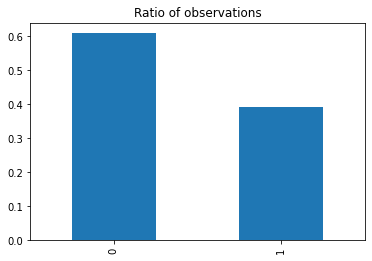

In [69]:
df['tagging'].value_counts(normalize=True).plot(kind='bar', title='Ratio of observations')
#ploting number of '1' and '0' in the 'tagging' colomn of the dataset

#As we can see the difference in number of '1' and '0' is not very large hence we call it as a balanced dataset 
#NOTE:It's very important to provide a balanced dataset for creating the model

In [70]:
#This line code converts floating numericals into integer numeric
#example: converting 1.0, 1.00, etc into integer 1
#example: converting 0.0, 0.00, etc into integer 0

df['tagging']=df['tagging'].astype(str).astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  20001 non-null  object
 1   tagging   20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


In [72]:
df.shape

(20001, 2)

In [73]:
#reseting the index of rows
# Index gets unordered if we drop some rows in our dataset(Example while using dropna() function)
df.reset_index(inplace = True, drop = True)

In [74]:
#this line of code will now be used to pply the functions on each sentences in the 'comments' column
#This will take time as it will use the 'clean_text' function on all the sentences in our dataset
#the .map() function applies the function at each sentences in the 'comments' column
df['Processed_Comment'] = df['comments'].map(clean_text)

In [75]:
#Splitting dataset for training and testing(80:20)

from sklearn.model_selection import train_test_split
#train_test_split is a funtion that splits dataset into two parts 
#80%(for training the model) and 20%(for testing the model)
#This function returns 4 values 
# 1 'Processed_comment' for training
# 2 'Processed_comment' for testing
# 3 'tagging' for training
# 3 'tagging' for testing
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Comment'], 
                                                    df['tagging'], 
                                                    random_state=42,test_size=0.20)

#random state is used to shuffle the dataset
#test_size=0.20 means that 20% of the dataset is to be allocated for testing of the model

In [76]:
#Creating a bag of words from training data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
X_test = count_vector.transform(X_test)

#vectorizing means giving value to the words in the sentence according to a formula
#This value tells us how much the word contributes in the sentence to be a cyberbulling comment 
#I guess this returns a table

In [77]:
#gives the number of columns in the vectorized table 
len(count_vector.vocabulary_)

13816

In [78]:
#Importing all the terms by which we get accuracy of our model
#NOTE:we haven't trained our model yet 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
#creates a confusion matrix
from sklearn.metrics import confusion_matrix
data =[] #Empty list created to add the accuracy terms of each model that we are going to train 

In [87]:
# Importing all the necessary models
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a dictionary of all the possible parameters of each ML model
model_params = {
    'LinearSVC': {
        'model': LinearSVC(max_iter=1000000, random_state=42),
        'params' : {
            'C': [0.1, 1, 5, 10, 20],
        }  
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000000),
        'params': {
            'C': [1, 5, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5, 9, 11, 23],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=42),
        'params' : {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params' : {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(random_state=42, max_iter=2000),
        'params' : {
            'hidden_layer_sizes': [(50, 50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001],
            'learning_rate_init': [0.001, 0.01, 0.1]
        }
    },
    'ExtraTreesClassifier': {
        'model': ExtraTreesClassifier(random_state=42),
        'params' : {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
        }
    }
}

# Creating a list to store the best parameters
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    # storing the values in 'scores' list
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Creating a table of the best parameters
df4 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df4)


                        model  best_score  \
0                   LinearSVC    0.958333   
1               MultinomialNB    0.958333   
2          LogisticRegression    0.966667   
3        KNeighborsClassifier    0.950000   
4      RandomForestClassifier    0.950000   
5  GradientBoostingClassifier    0.950000   
6          AdaBoostClassifier    0.933333   
7      DecisionTreeClassifier    0.941667   
8               MLPClassifier    0.975000   
9        ExtraTreesClassifier    0.950000   

                                         best_params  
0                                          {'C': 10}  
1                 {'alpha': 0.5, 'fit_prior': False}  
2                    {'C': 1, 'solver': 'newton-cg'}  
3  {'metric': 'euclidean', 'n_neighbors': 11, 'we...  
4  {'criterion': 'gini', 'max_depth': None, 'n_es...  
5  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
6           {'learning_rate': 1, 'n_estimators': 50}  
7  {'criterion': 'gini', 'max_depth': None, 'min_...  
8  {'acti

In [88]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Creating a dictionary of all the possible parameters of each ML model
model_params = {
    'LinearSVC': {
        'model': LinearSVC(max_iter=1000000, random_state=42),
        'params' : {
            'C': [0.1, 1, 5, 10, 20],
        }  
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000000),
        'params': {
            'C': [1, 5, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5, 9, 11, 23],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=42),
        'params' : {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params' : {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(random_state=42, max_iter=2000),
        'params' : {
            'hidden_layer_sizes': [(50, 50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001],
            'learning_rate_init': [0.001, 0.01, 0.1]
        }
    },
    'ExtraTreesClassifier': {
        'model': ExtraTreesClassifier(random_state=42),
        'params' : {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
        }
    }
}

# Creating a list to store the best parameters and their evaluation scores
scores = []
data = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    # Best estimator from GridSearchCV
    best_model = clf.best_estimator_
    
    # Predictions for training and testing datasets
    predictions_train = best_model.predict(X_train)
    predictions_test = best_model.predict(X_test)
    
    # Storing the best parameters and scores
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    # Creating a temp list to store the accuracy terms
    temp = [model_name]
    temp.append(accuracy_score(predictions_train, y_train))  # accuracy_score for training data
    temp.append(recall_score(predictions_train, y_train, average='macro'))    # recall_score for training data
    temp.append(f1_score(predictions_train, y_train, average='macro'))        # f1_score for training data
    temp.append(precision_score(predictions_train, y_train, average='macro')) # precision_score for training data
    temp.append(accuracy_score(predictions_test, y_test))    # accuracy_score for testing data
    temp.append(recall_score(predictions_test, y_test, average='macro'))      # recall_score for testing data
    temp.append(f1_score(predictions_test, y_test, average='macro'))          # f1_score for testing data
    temp.append(precision_score(predictions_test, y_test, average='macro'))   # precision_score for testing data

    # Storing all the accuracy terms in 'data' list
    data.append(temp)

# Creating a DataFrame for best parameters and their evaluation scores
df4 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df4)

# Creating a DataFrame for accuracy terms
columns = ['Model', 'Train Accuracy', 'Train Recall', 'Train F1', 'Train Precision', 'Test Accuracy', 'Test Recall', 'Test F1', 'Test Precision']
df5 = pd.DataFrame(data, columns=columns)
print(df5)


                        model  best_score  \
0                   LinearSVC    0.958333   
1               MultinomialNB    0.958333   
2          LogisticRegression    0.966667   
3        KNeighborsClassifier    0.950000   
4      RandomForestClassifier    0.950000   
5  GradientBoostingClassifier    0.950000   
6          AdaBoostClassifier    0.933333   
7      DecisionTreeClassifier    0.941667   
8               MLPClassifier    0.975000   
9        ExtraTreesClassifier    0.950000   

                                         best_params  
0                                          {'C': 10}  
1                 {'alpha': 0.5, 'fit_prior': False}  
2                    {'C': 1, 'solver': 'newton-cg'}  
3  {'metric': 'euclidean', 'n_neighbors': 11, 'we...  
4  {'criterion': 'gini', 'max_depth': None, 'n_es...  
5  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
6           {'learning_rate': 1, 'n_estimators': 50}  
7  {'criterion': 'gini', 'max_depth': None, 'min_...  
8  {'acti

# Summary

In [89]:
#Creating a table of all accuracy terms of each trained ML models
result = pd.DataFrame(data, columns = ['Algorithm','Accuracy Score : Train', 'Recall Score : Train','F1-Score :Train','Precision Score :Train','Accuracy Score : Test', 'Recall Score : Test','F1-Score : Test','Precision Score : Test'])
result.reset_index(drop=True, inplace=True)

In [90]:
result

,Algorithm,Accuracy Score : Train,Recall Score : Train,F1-Score :Train,Precision Score :Train,Accuracy Score : Test,Recall Score : Test,F1-Score : Test,Precision Score : Test
0,LinearSVC,0.975000,0.975000,0.974996,0.975193,1.000000,1.00000,1.00000,1.00000
1,MultinomialNB,0.958333,0.958333,0.958327,0.958516,0.933333,0.93266,0.93266,0.93266
2,LogisticRegression,0.975000,0.976190,0.974996,0.975610,1.000000,1.00000,1.00000,1.00000
3,KNeighborsClassifier,0.958333,0.959482,0.958327,0.958933,1.000000,1.00000,1.00000,1.00000
4,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000
5,GradientBoostingClassifier,0.975000,0.976190,0.974996,0.975610,1.000000,1.00000,1.00000,1.00000
6,AdaBoostClassifier,0.966667,0.967063,0.966667,0.967063,1.000000,1.00000,1.00000,1.00000
7,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000
8,MLPClassifier,0.975000,0.976190,0.974996,0.975610,1.000000,1.00000,1.00000,1.00000
9,ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000


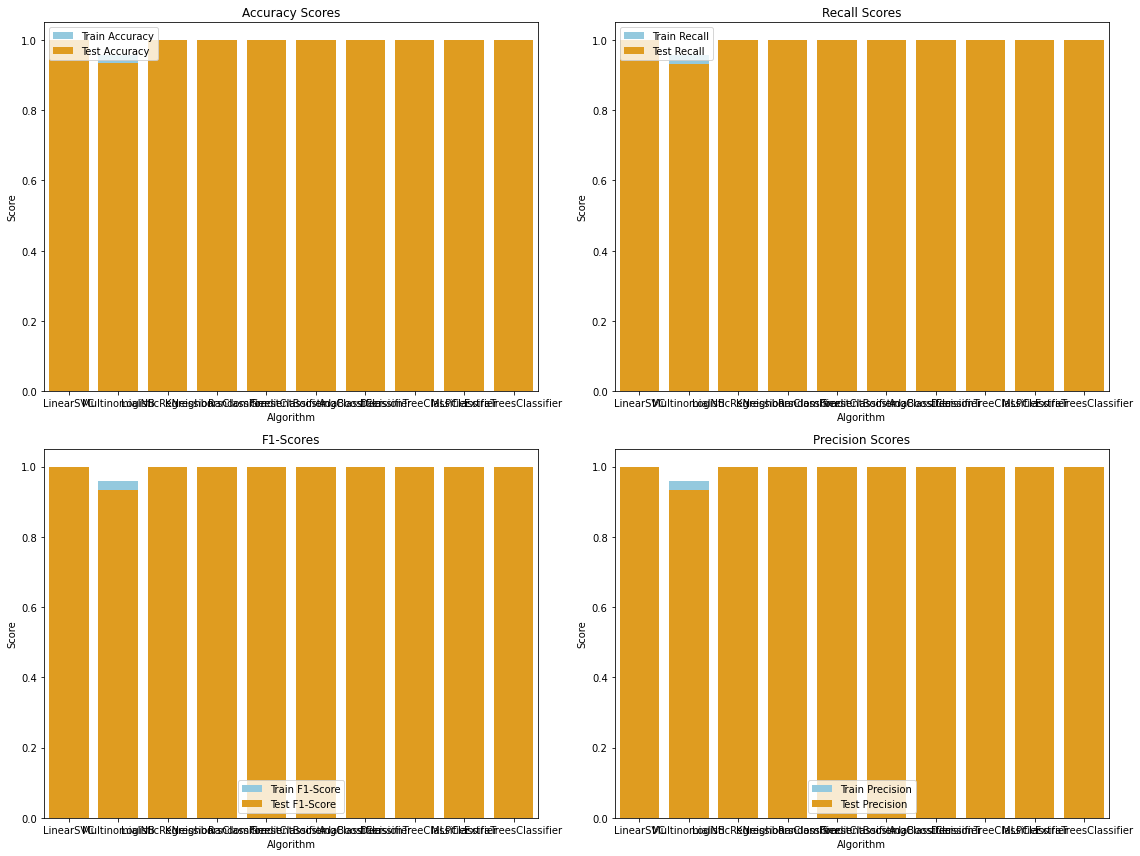

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data for plotting
algorithms = result['Algorithm']
train_accuracy = result['Accuracy Score : Train']
test_accuracy = result['Accuracy Score : Test']
train_recall = result['Recall Score : Train']
test_recall = result['Recall Score : Test']
train_f1 = result['F1-Score :Train']
test_f1 = result['F1-Score : Test']
train_precision = result['Precision Score :Train']
test_precision = result['Precision Score : Test']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4)

# Defining color palettes
train_color = 'skyblue'
test_color = 'orange'

# Plotting Accuracy Scores
sns.barplot(x=algorithms, y=train_accuracy, ax=axes[0, 0], color=train_color, label='Train Accuracy')
sns.barplot(x=algorithms, y=test_accuracy, ax=axes[0, 0], color=test_color, label='Test Accuracy')
axes[0, 0].set_title('Accuracy Scores')
axes[0, 0].set_ylabel('Score')
axes[0, 0].legend()

# Plotting Recall Scores
sns.barplot(x=algorithms, y=train_recall, ax=axes[0, 1], color=train_color, label='Train Recall')
sns.barplot(x=algorithms, y=test_recall, ax=axes[0, 1], color=test_color, label='Test Recall')
axes[0, 1].set_title('Recall Scores')
axes[0, 1].set_ylabel('Score')
axes[0, 1].legend()

# Plotting F1-Scores
sns.barplot(x=algorithms, y=train_f1, ax=axes[1, 0], color=train_color, label='Train F1-Score')
sns.barplot(x=algorithms, y=test_f1, ax=axes[1, 0], color=test_color, label='Test F1-Score')
axes[1, 0].set_title('F1-Scores')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()

# Plotting Precision Scores
sns.barplot(x=algorithms, y=train_precision, ax=axes[1, 1], color=train_color, label='Train Precision')
sns.barplot(x=algorithms, y=test_precision, ax=axes[1, 1], color=test_color, label='Test Precision')
axes[1, 1].set_title('Precision Scores')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()

# Displaying the plot
plt.tight_layout()
plt.show()


# Saving models in .pkl file

In [94]:
import pickle
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Define all the models
clfs = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Multilayer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Assuming you have the training and testing data
# X_train, X_test, y_train, y_test

# List to store the accuracy of each model
accuracies = []

# Train each model and save it to a .pkl file
for name, clf in clfs.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Save the trained model to a .pkl file
    with open(f'{name}.pkl', 'wb') as file:
        pickle.dump(clf, file)
    
    # Calculate accuracy
    accuracy = clf.score(X_test, y_test)
    accuracies.append((name, accuracy))

# Print the accuracy of the models
for name, accuracy in accuracies:
    print(f'Model: {name}, Accuracy: {accuracy:.4f}')


Model: Random Forest, Accuracy: 1.0000
Model: Gradient Boosting, Accuracy: 1.0000
Model: AdaBoost, Accuracy: 1.0000
Model: LightGBM, Accuracy: 1.0000
Model: XGBoost, Accuracy: 1.0000
Model: Decision Tree, Accuracy: 1.0000
Model: Support Vector Machine, Accuracy: 1.0000
Model: Naive Bayes, Accuracy: 0.9000
Model: Multilayer Perceptron, Accuracy: 1.0000
Model: KNeighborsClassifier, Accuracy: 1.0000
